<h1>HighBoost Filtering<h1>

Alunos:<br>
    Vitor Fernandes Gonçalves da Cruz Ra120116 <br> 
    Vitor Rodrigues Gôngora RA106769

<h2>Introdução<h2>

O presente trabalho tem como objetivo receber uma imagem de entrada e aplicar o método  HighBoost Filter através da linguagem de programação python, utilizando o método unsharping mask, no qual consite em subtrair a imagem suavizada da imagem original. O método pode ser descrito pelos seguintes pasoss:<br>
1. Blur da imagem original através do filtro da média.
2. Subtração a imagem suavizada da imagem original, no qual chamamos de g_mask.
3. Multiplicação de um escalar k com g_mask.
4. Soma da imagem original com o passo 3.

Para aplicar a suavização na imagem, precisa-se de um conceito chamado convolução, no qual é o processo de mover uma máscara, ou kernel, pela imagem e calcular a soma do produto ponto a ponto entre a imagem e a máscara rebatida. Uma máscara rebatida é basicamente uma inversão da máscara original, representada por g̅(x, y) = g(-x, -y). Para se ter o high boost filtering precisa-se que k>1

In [71]:
import numpy as np
import  cv2
import matplotlib.pyplot as plt

In [72]:

def shift(dx, dy, image):
    x_start = max(0, -dx)
    y_start = max(0, -dy)
    
    x_end = min(image.shape[0], image.shape[0] - dx)
    y_end = min(image.shape[1], image.shape[1] - dy)
    image = image[x_start:x_end, y_start:y_end]
    
    #padding de zeros depois que translada a imagem
    if(dx<0 and dy<0) :
        image = np.pad(image, ((0,-dx),(0,-dy)), mode='constant', constant_values=0)
    elif(dx<0 and dy>=0) :
        image = np.pad(image, ((0,-dx),(dy,0)), mode='constant', constant_values=0)
    elif(dx>=0 and dy<0) :
        image = np.pad(image, ((dx,0),(0,-dy)), mode='constant', constant_values=0)
    elif(dx>=0 and dy>=0) :
        image = np.pad(image, ((dx,0),(dy,0)), mode='constant', constant_values=0)
  
    return image

In [73]:
#Rebate a máscara
def inverse_mask(mask):
    mask = np.flipud(np.fliplr(mask))
    return mask

In [74]:
def convolution(mask, image):
    mask = inverse_mask(mask) # rebate a mascara
    image_conv = np.zeros((image.shape[0],image.shape[1]))
    #varrendo a mascara(como mostrado em sala)
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            #translada a mascara
            auxiliar_matrix = shift(i-((mask.shape[0]-1)//2),j-((mask.shape[1]-1)//2),image)#deslocamento
            #Multiplica pelos pesos
            auxiliar_matrix_multiply_by_weight =  mask[i][j]*auxiliar_matrix
            #Acumula
            image_conv = image_conv + auxiliar_matrix_multiply_by_weight
    return image_conv

In [75]:
def average_filter(mask):
    total = np.sum(mask)
    result_mask = mask/total
    return result_mask

In [76]:

def highBoost(image, image_blur, mask,k,input_user):
    mask_average_filter = average_filter(mask)

    #Faz a convolução em cada banda
    image_blur_blue = convolution(mask_average_filter,image_blur[:,:,0])
    image_blur[:,:,0] = image_blur_blue

    image_blur_greeen = convolution(mask_average_filter,image_blur[:,:,1])
    image_blur[:,:,1] = image_blur_greeen

    image_blur_red = convolution(mask_average_filter,image_blur[:,:,2])
    image_blur[:,:,2] = image_blur_red

    g_mask = cv2.subtract(image,image_blur)
    mult = (k*g_mask).astype('uint8')
    image_result = cv2.add(image,mult)

    cv2.imwrite("Blur_Image_"+input_user,image_blur)
    cv2.imwrite("HighBoost_filter_"+input_user,image_result)


    # Criação da figura e dos subplots
    fig = plt.figure(figsize=(12, 4))

    # Primeiro subplot
    fig.add_subplot(1, 2, 1)
    plt.title('Blur Image')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image_blur, cv2.COLOR_BGR2RGB))

    # Segundo subplot
    fig.add_subplot(1, 2, 2)
    plt.title('HighBoost Filter k='+str(k))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB))

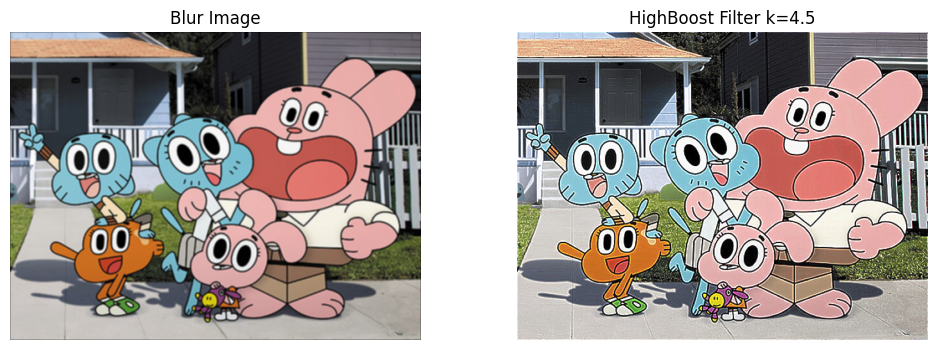

In [77]:
mask = np.array([[1,1,1],[1,1,1],[1,1,1]])
#mask = np.array([[3,2,1],[3,2,1],[3,2,1]])
# image = np.array([[1,2 ,3, 2, 8, 4],
#                   [1, 2, 5, 1, 2, 3],
#                   [2, 8, 4, 1, 2, 5],
#                   [3, 2, 1, 5, 2, 1],
#                   [4, 8, 2, 3, 2, 1],
#                   [1, 2, 5, 2, 8, 4]])
# print(image)
# convolution(mask,image)
#Mascara da media
k  = 4.5
input_user = str(input('Entre com o nome da imagem'))
image  = cv2.imread(input_user)
image_blur = image.copy()
highBoost(image,image_blur,mask,k,input_user)

<h2>Referêcias<h2>

GONZALEZ, Rafael C.; WOODS, Richard E.. Processamento de Imagens Digitais. 3. ed. São Paulo: Pearson,2007